# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [230]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## 1.1 Reading Data

In [231]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [232]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [233]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.8583040422 %)
Number of projects thar are not approved for funding  16542 , ( 15.1416959578 %)


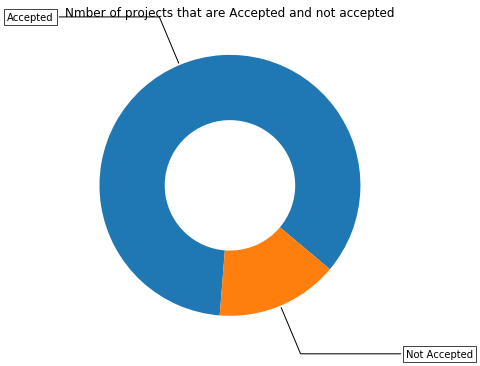

In [234]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

**Observation: ** Around 85% of projects are approved i.e. 92706 projects are approved from 109248 submitted projects. 

### 1.2.1 Univariate Analysis: School State

In [235]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')'''


'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [236]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


**Observation: ** State code DE has highest number of approved projects and VT has lowest

In [237]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [238]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

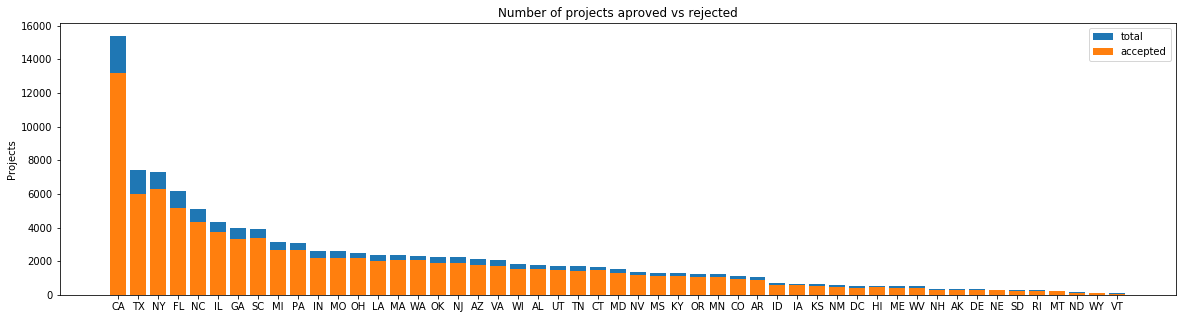

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [239]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

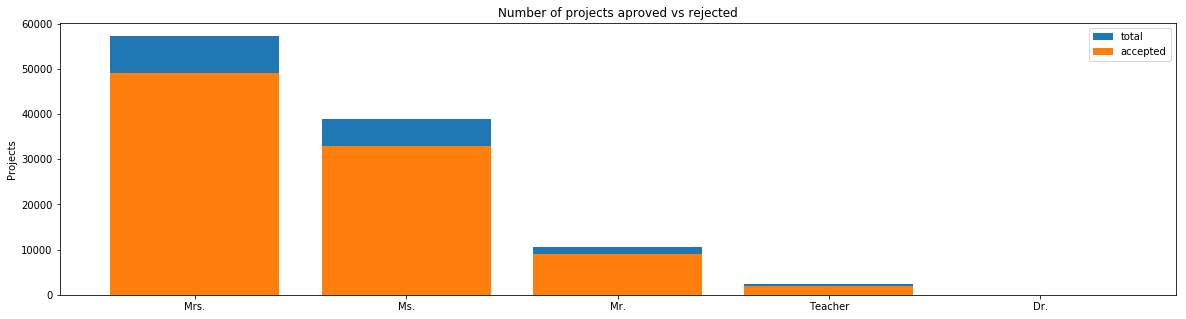

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [240]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

**Observation: ** Among submitted project, project submitted by Mrs. teacher prefix has highest approvals more than 85% and Dr has lowest

### 1.2.3 Univariate Analysis: project_grade_category

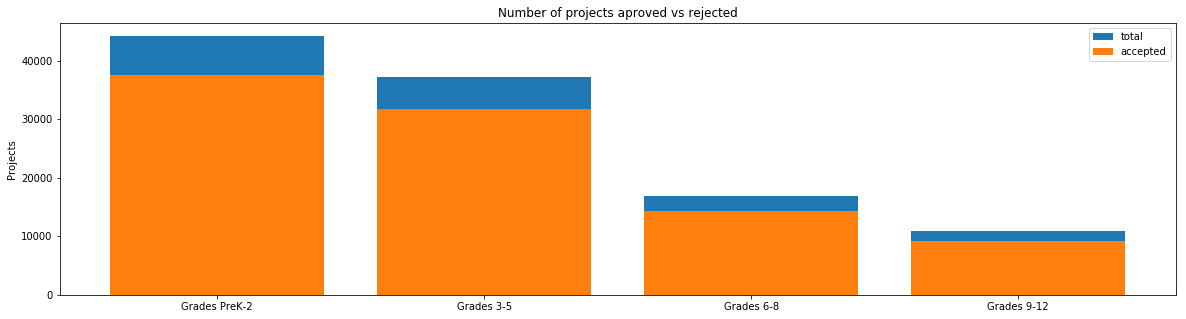

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [241]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

**Observation: ** Project grade category Grades Prek-2 has highest approved project around 85% while Grades 9-12 has lowest.

### 1.2.4 Univariate Analysis: project_subject_categories

In [242]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [243]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


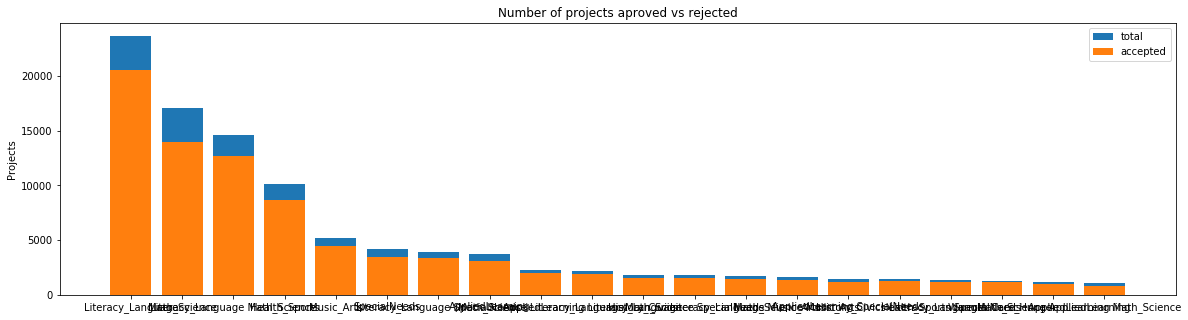

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [244]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

**Observation: ** Maximum approved projects are on Literacy Language more than 86% and AppliedLearning Math_Science has least.

In [245]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

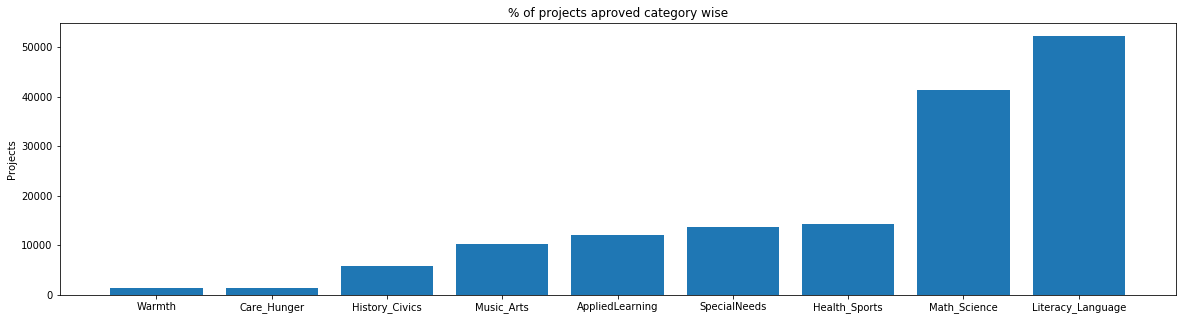

In [246]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [247]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


**Observation: ** Category Literacy language has maximum submitted project and Warmth and Core_Hunger has least.

### 1.2.5 Univariate Analysis: project_subject_subcategories

In [248]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [249]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


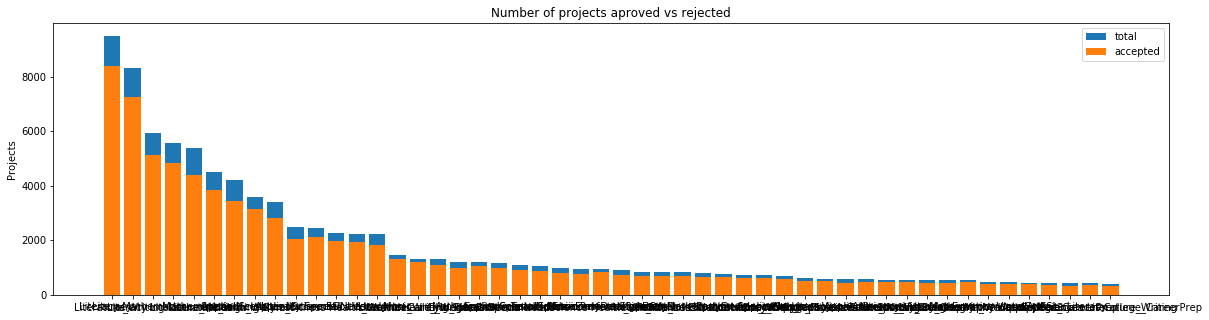

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [250]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

**Observation: ** Literacy subcategory has highest approved projects while  AppliedSciences College_CareerPrep has least.

In [251]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

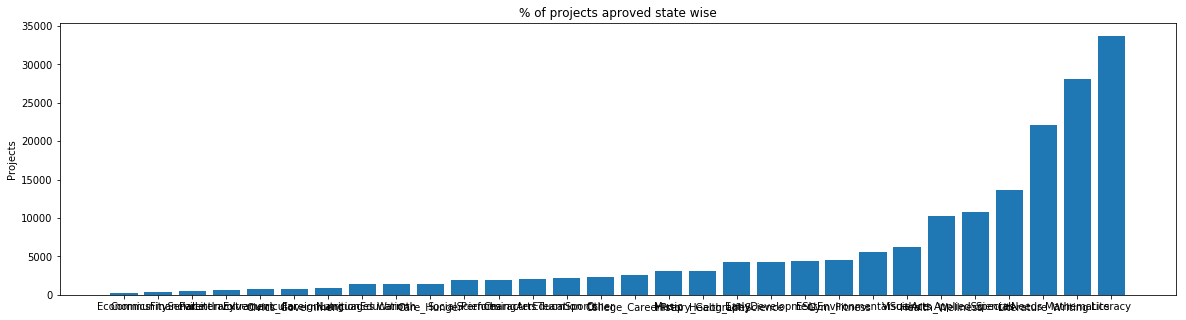

In [252]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [253]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


**Observation: ** Subcategory Economics has least number of submitted project while Literacy has max. 

### 1.2.6 Univariate Analysis: Text features (Title)

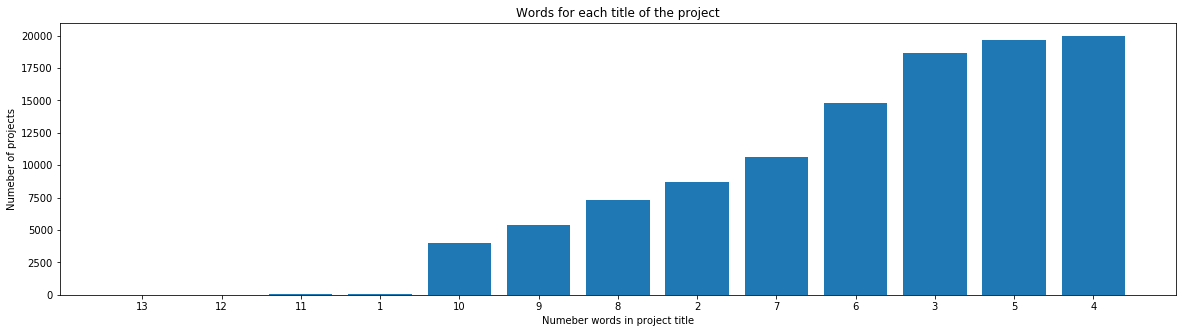

In [254]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

**Observation: ** Project Title contains 4 and 5 words mostly and very less title has more than 10 words

In [255]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

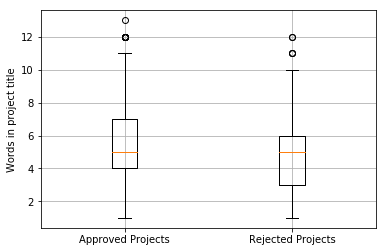

In [256]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

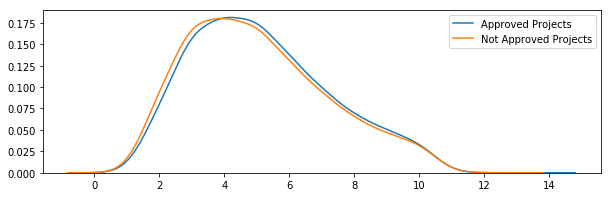

In [257]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**Observation: ** Box plot shows that approved projects tile has more words as compared to non approved projects title. PDF shows that both approved and non approved creates slightly right skewed graph. 

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [258]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [259]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

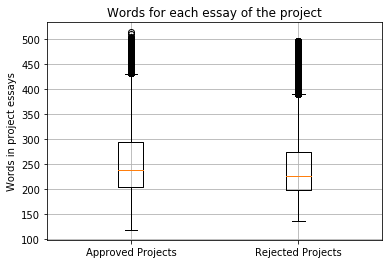

In [260]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

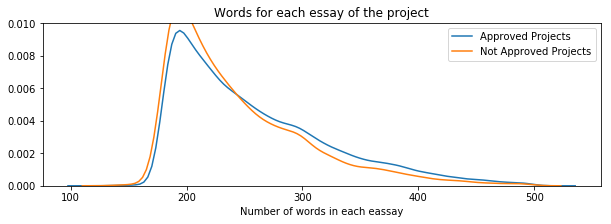

In [261]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

**Observation:** Box plot shows that Approved project has more words in essay as compared to non approved projects. PDF shows that non- approved project essayhas very high density of words around 200. It creates right skewed graph. 

### 1.2.8 Univariate Analysis: Cost per project

In [262]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [263]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [264]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [265]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values


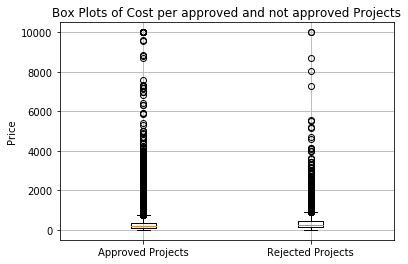

In [266]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

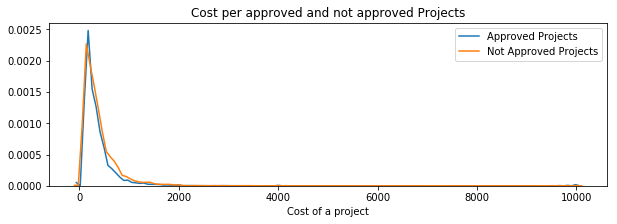

In [267]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

**Observation: ** Box plot does not elaborate much diffrence in cost for approved and non approved project. PDF shows approved and rejected projects have very high density cost near 1000.

In [268]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

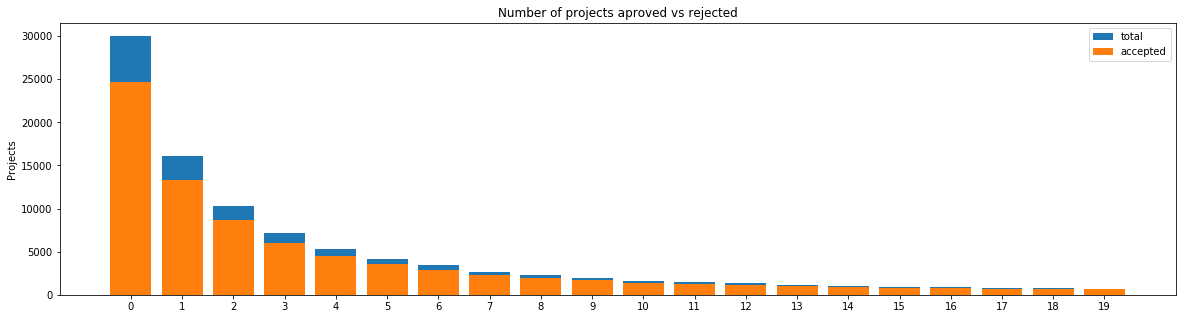

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
15                                            15                  818    942   
16                                            16                  769    894   
17                                            17                  712    803   
18                                            18                  666    772   
19                                       

In [269]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved' , top=20)

**Observation:** There are 202 projects which are submitted for the first time out of which 168 are approved. Around 83% of new projects are approved.

In [270]:
teacher_prefix_project_data = project_data.groupby('teacher_prefix').agg({'teacher_number_of_previously_posted_projects':'sum'}).reset_index()
print(teacher_prefix_project_data)

school_state_project_data = project_data.groupby('school_state').agg({'teacher_number_of_previously_posted_projects':'sum'}).reset_index()
print(school_state_project_data.sort_values(by=['teacher_number_of_previously_posted_projects']))

project_grade_category_project_data = project_data.groupby('project_grade_category').agg({'teacher_number_of_previously_posted_projects':'sum'}).reset_index()
print(project_grade_category_project_data.sort_values(by=['teacher_number_of_previously_posted_projects']))

  teacher_prefix  teacher_number_of_previously_posted_projects
0            Dr.                                            53
1            Mr.                                        129559
2           Mrs.                                        639594
3            Ms.                                        441583
4        Teacher                                          7671
   school_state  teacher_number_of_previously_posted_projects
50           WY                                           474
46           VT                                           554
28           ND                                          1088
41           SD                                          1347
26           MT                                          1665
30           NH                                          2141
29           NE                                          2225
39           RI                                          2307
21           ME                                          2949
12

**Observation: **

i.   Teacher with Prefix Mrs. submitted maximum number of previously posted projects and prefix with Teacher submitted least.

 ii.  State Code CA has maximum number of previously posted projects and DC and NM has least.
 
 iii. Grades PreK-2 has maximum number of previously posted projects and Grades 6-8 has least.

In [271]:
clean_categories_project_data = project_data.groupby('clean_categories').agg({'teacher_number_of_previously_posted_projects':'sum'}).reset_index()
print(clean_categories_project_data.sort_values(by=['teacher_number_of_previously_posted_projects']).head(2))
print(clean_categories_project_data.sort_values(by=['teacher_number_of_previously_posted_projects']).tail(2))

clean_subcategories_project_data = project_data.groupby('clean_subcategories').agg({'teacher_number_of_previously_posted_projects':'sum'}).reset_index()
print(clean_subcategories_project_data.sort_values(by=['teacher_number_of_previously_posted_projects']).head(5))
print(clean_subcategories_project_data.sort_values(by=['teacher_number_of_previously_posted_projects']).tail(2))


                     clean_categories  \
23  History_Civics Warmth Care_Hunger   
45      Music_Arts Warmth Care_Hunger   

    teacher_number_of_previously_posted_projects  
23                                             2  
45                                            74  
     clean_categories  teacher_number_of_previously_posted_projects
32       Math_Science                                        184941
24  Literacy_Language                                        208628
                   clean_subcategories  \
102      College_CareerPrep TeamSports   
184                    Economics Other   
112       CommunityService Gym_Fitness   
129                      ESL Economics   
67   Civics_Government Health_Wellness   

     teacher_number_of_previously_posted_projects  
102                                             0  
184                                             0  
112                                             0  
129                                             0  
67    

**Observation:** 

Project category History_Civics Math_Science has no previously posted project while Health_Sports has maximum.

Project Subcategory arlyDevelopment SpecialNeeds, CommunityService , EnvironmentalScience History_Geography, History_Geography Mathematics, Health_Wellness Other has no previously posted project while Warmth Care_Hunger  has maximum.

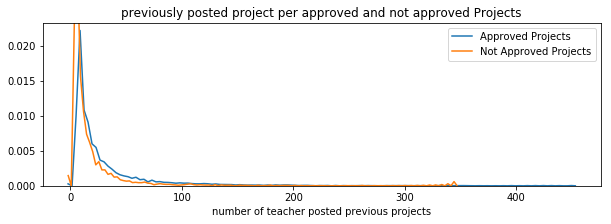

In [272]:
approved_project = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
rejected_project = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values
plt.figure(figsize=(10,3))
sns.distplot(approved_project, hist=False, label="Approved Projects")
sns.distplot(rejected_project, hist=False, label="Not Approved Projects")
plt.title('previously posted project per approved and not approved Projects')
plt.xlabel('number of teacher posted previous projects')
plt.legend()
plt.show()

**Observation: **

Distribution plot of approved and not approved project with teacher_number_of_previously_posted_projects shows high density between 0 and 30.

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [273]:
# To check whether a string has digit.https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
def hasNumbers(inputString):
     return bool(re.search(r'\d', inputString))

    
resource_summary = list(project_data['project_resource_summary'].values)

res_sum_list = []
for i in resource_summary:
    temp_data = ""
    
    for j in i.split(' '): # Splitting based on spaces
        
        if 'My' in j: # Removing repetition word 'My'
            j = ''
         
        if 'students' in j: # Removing repition word 'students'
            j = ''
        
        if 'need' in j: # Replacing need with Required.
            j = j.replace('need', 'Required')
            
        if (hasNumbers(j) == True): # if string has digit remove string as it is not helpful in classification
            j = ''
        
        temp_data += j.strip()+" " # Removing trailer/trimming string
        temp_data = temp_data.replace('&',' ') # Replacing & with space
    res_sum_list.append(temp_data.strip()) # Appending list

In [274]:
project_data['clean_resource_summary'] = res_sum_list
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.head(20)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,clean_resource_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23,Required opportunities to practice beginning r...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1,Required a projector to help with viewing educ...
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22,"Required shine guards, athletic socks, Soccer ..."
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4,Required to engage in Reading and Math in a wa...
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4,Required hands on practice in mathematics. Hav...
5,141660,p154343,a50a390e8327a95b77b9e495b58b9a6e,Mrs.,FL,2017-04-08 22:40:43,Grades 3-5,Flexible Seating for Mrs. Jarvis' Terrific Thi...,I will be moving from 2nd grade to 3rd grade a...,These flexible seating options will allow my s...,NaN,NaN,1,1,Literacy_Language SpecialNeeds,Literature_Writing SpecialNeeds,I will be moving from 2nd grade to 3rd grade a...,113.22,11,Required movement to be successful. Being that...
6,21147,p099819,9b40170bfa65e399981717ee8731efc3,Mrs.,CT,2017-02-17 19:58:56,Grades 6-8,Chromebooks for Special Education Reading Program,My students are a dynamic and very energetic g...,My students are an engaging and active group o...,NaN,NaN,1,1,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,My students are a dynamic and very energetic g...,159.99,3,Required some dependable laptops for daily cla...
7,94142,p092424,5bfd3d12fae3d2fe88684bbac570c9d2,Ms.,GA,2016-09-01 00:02:15,Grades 3-5,It's the 21st Century,Not only do our students struggle with poverty...,"My students need 4 iPads, the latest technolog...",NaN,NaN,7,1,Math_Science,Mathematics,Not only do our students struggle with poverty...,229.00,4,Required ipads to help them access a world of ...
8,112489,p045029,487448f5226005d08d36bdd75f095b31,Mrs.,SC,2016-09-25 17:00:26,Grades PreK-2,Targeting More Success in Class,My students are enthusiastic and inquisitive l...,My second graders need extra activity time dur...,NaN,NaN,28,1,Health_Sports,Health_Wellness,My students are enthusiastic and inquisitive l...,241.98,6,Required three devices and three management li...
9,158561,p001713,140eeac1885c820ad5592a409a3a8994,Ms.,NC,2016-11-17 18:18:56,Grades PreK-2,Just For the Love of Reading--\r\nPure Pleasure,Over 95%

**Observation:** In above data, project_resource_summary is dropped and clean_resource_summary created with alterations

{111: 1, 63: 1, 35: 2, 2: 9, 4: 42, 3: 45, 5: 80, 6: 206, 7: 453, 8: 1504, 34: 2020, 28: 2234, 27: 2277, 29: 2314, 25: 2416, 26: 2429, 30: 2514, 24: 2578, 31: 2702, 23: 2877, 32: 2913, 22: 2946, 33: 2973, 21: 3153, 20: 3364, 19: 3779, 18: 4221, 17: 4464, 16: 4883, 15: 5385, 14: 5829, 13: 6187, 12: 6791, 11: 7458, 10: 7907, 9: 10291}


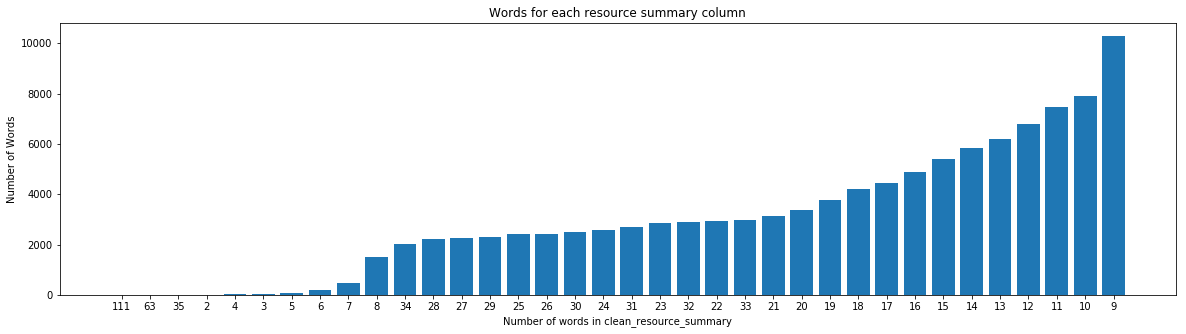

In [275]:
rs_word_count = project_data['clean_resource_summary'].str.split().apply(len).value_counts()
rs_word_dict = dict(rs_word_count)
rs_word_dict = dict(sorted(rs_word_dict.items(), key=lambda kv: kv[1]))
print(rs_word_dict)
rs_ind = np.arange(len(rs_word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(rs_ind, list(rs_word_dict.values()))

plt.ylabel('Number of Words')
plt.xlabel('Number of words in clean_resource_summary')
plt.title('Words for each resource summary column')
plt.xticks(rs_ind, list(rs_word_dict.keys()))
plt.show()

**Observation: **Resource summary column has a single word maximum of around 70 times and minimum 1 time

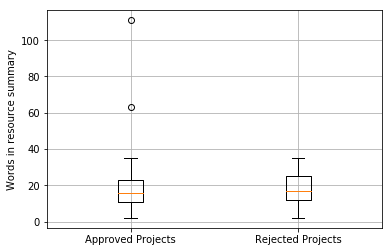

In [276]:
approved_rs_word_count = project_data[project_data['project_is_approved']==1]['clean_resource_summary'].str.split().apply(len)
approved_rs_word_count = approved_rs_word_count.values

rejected_rs_word_count = project_data[project_data['project_is_approved']==0]['clean_resource_summary'].str.split().apply(len)
rejected_rs_word_count = rejected_rs_word_count.values

plt.boxplot([approved_rs_word_count, rejected_rs_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in resource summary')
plt.grid()
plt.show()

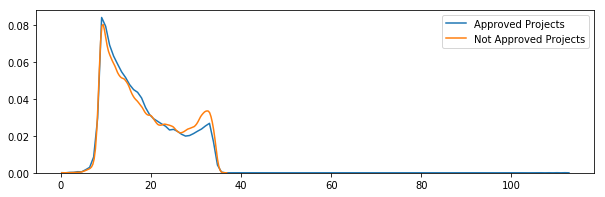

In [277]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_rs_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_rs_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

**Observation: ** Rejected project has more words in resource summary as copared to approved projects and word density is high between 5 to 10.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [278]:
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,clean_resource_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,Required opportunities to practice beginning r...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,Required a projector to help with viewing educ...


In [279]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[300])
print("="*50)
print(project_data['essay'].values[500])
print("="*50)
print(project_data['essay'].values[700])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

We strive to create a loving and nurturing classroom, where students can feel safe and supported, so that they can be fully engaged throughout their day in order to learn to become their best selves.\r\n\r\n\r\nOur goal is to help foster their growth, both personally and academically, despite their severely complex medical needs. We do not want them to see their disabilities as limitations, but rather as an opportunity to find successful ways to navigate their environment.  We want to set them up for success so that they can access their environment just like their typical peers. We want to give them each the individual tool they need to succeed. \r\n\r\nOur goal is to always give our students opportunities in which they can feel successful and included in. These materials will help with their physical therapy, gross motor development, and self-esteem. Through adapted sports, our students will also learn about what it means to be part of a team and also the chance to form friendships. 

In [280]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [281]:
sent = decontracted(project_data['essay'].values[500])
print(sent)
print("="*50)

My students are high school seniors who are simultaneously excited for and terrified by the prospect of college. In order to help them prepare for the academic demands of college, I have placed a heavy writing requirement in our ELA class spanning essays, poetry, memoirs, etc.\r\n\r\nMy students are the definition of survivors. They have grown up in some of the toughest neighborhoods in New York. They fight the norm that surrounds them every single day by making the decision to stay in school and better themselves - both academically and emotionally. This group of students has made it to their senior year of high school - a milestone that too many of their friends, family, and former classmates have not yet been able to achieve. They have big plans for college and want to go on to become doctors, lawyers, teachers, and investment bankers. They have only a short year until they will have to navigate the world outside of the school that many of them have known since sixth grade. I want t

In [282]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are high school seniors who are simultaneously excited for and terrified by the prospect of college. In order to help them prepare for the academic demands of college, I have placed a heavy writing requirement in our ELA class spanning essays, poetry, memoirs, etc.    My students are the definition of survivors. They have grown up in some of the toughest neighborhoods in New York. They fight the norm that surrounds them every single day by making the decision to stay in school and better themselves - both academically and emotionally. This group of students has made it to their senior year of high school - a milestone that too many of their friends, family, and former classmates have not yet been able to achieve. They have big plans for college and want to go on to become doctors, lawyers, teachers, and investment bankers. They have only a short year until they will have to navigate the world outside of the school that many of them have known since sixth grade. I want to en

In [283]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are high school seniors who are simultaneously excited for and terrified by the prospect of college In order to help them prepare for the academic demands of college I have placed a heavy writing requirement in our ELA class spanning essays poetry memoirs etc My students are the definition of survivors They have grown up in some of the toughest neighborhoods in New York They fight the norm that surrounds them every single day by making the decision to stay in school and better themselves both academically and emotionally This group of students has made it to their senior year of high school a milestone that too many of their friends family and former classmates have not yet been able to achieve They have big plans for college and want to go on to become doctors lawyers teachers and investment bankers They have only a short year until they will have to navigate the world outside of the school that many of them have known since sixth grade I want to ensure that they are given

In [284]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [285]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:55<00:00, 1973.24it/s]


In [286]:
# after preprocesing
preprocessed_essays[500]

'my students high school seniors simultaneously excited terrified prospect college in order help prepare academic demands college i placed heavy writing requirement ela class spanning essays poetry memoirs etc my students definition survivors they grown toughest neighborhoods new york they fight norm surrounds every single day making decision stay school better academically emotionally this group students made senior year high school milestone many friends family former classmates not yet able achieve they big plans college want go become doctors lawyers teachers investment bankers they short year navigate world outside school many known since sixth grade i want ensure given resources necessary transition high school college beyond without computers home many students hand write multi paragraph essays type line line cell phones adding 5 chromebooks classroom allow students practice essential skills writing process computer these skills basic mechanics typing revision rough draft necess

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [287]:
# printing some project titles.
for i in range (0,21):
    
    print(project_data['project_title'].values[i])
    print("="*50)
    

Educational Support for English Learners at Home
Wanted: Projector for Hungry Learners
Soccer Equipment for AWESOME Middle School Students
Techie Kindergarteners
Interactive Math Tools
Flexible Seating for Mrs. Jarvis' Terrific Third Graders!!
Chromebooks for Special Education Reading Program
It's the 21st Century
Targeting More Success in Class
Just For the Love of Reading--\r\nPure Pleasure
Reading Changes Lives
Elevating Academics and Parent Rapports Through Technology
Building Life Science Experiences
Everyone deserves to be heard!
TABLETS CAN SHOW US THE WORLD
Making Recess Active
Making Great LEAP's With Leapfrog!
Technology Teaches Tomorrow's Talents Today
Test Time
Wiggling Our Way to Success
Magic Carpet Ride in Our Library


**Printed first 20 data of project title from the train.csv. Data has many stopwords and special characters. Even it has /r/n also. Some titles have numbers also like(21st). Some titles have 'it's'.**

In [288]:
preprocessed_titles = []

for dataset in tqdm(project_data['project_title'].values):
    data = decontracted(dataset)  # Replacing some specific and general short form into proper word/stopword.
    data = re.sub(r"it's", "it is", data) # Replacing it's with it is as it is not part of function decontracted
    data = data.replace('\\r', ' ') # Replacing \r with space
    data = data.replace('\\"', ' ') # Replacing \ with space
    data = data.replace('\\n', ' ') # Replacing \n with space
    data = re.sub('[^A-Za-z0-9]+', ' ', data) # Replacing special characters with space
    data = re.sub("\S*\d\S*", "", data).strip() # Trimming numbers containing digits
    
    data = ' '.join(e for e in data.split() if e not in stopwords) # Removing stopwords 
    preprocessed_titles.append(data.lower().strip()) # Creating array in all the lower cases. 

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 34677.92it/s]


In [289]:
for i in range (0,21):
    print(preprocessed_titles[i])
    print("="*50)

educational support english learners home
wanted projector hungry learners
soccer equipment awesome middle school students
techie kindergarteners
interactive math tools
flexible seating mrs jarvis terrific third graders
chromebooks special education reading program
it century
targeting more success class
just for love reading pure pleasure
reading changes lives
elevating academics parent rapports through technology
building life science experiences
everyone deserves heard
tablets can show us the world
making recess active
making great leap with leapfrog
technology teaches tomorrow talents today
test time
wiggling our way success
magic carpet ride our library


**Observation: ** As we can see after preprocessing data do not have any special characters, symbols, stopwords and all the words are in lowercase

## 1. 4 Preparing data for models

In [290]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'teacher_number_of_previously_posted_projects',
       'project_is_approved', 'clean_categories', 'clean_subcategories',
       'essay', 'price', 'quantity', 'clean_resource_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [291]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [292]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [293]:
school_state_vectorizer = CountVectorizer(lowercase=False, binary=True)
school_state_vectorizer.fit(project_data['school_state'].values)
print(school_state_vectorizer.get_feature_names())

school_state_one_hot = school_state_vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)
print("the type of count vectorizer ",type(school_state_one_hot))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (109248, 51)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>


In [294]:
# https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
project_data["teacher_prefix"].fillna("No_Prefix", inplace = True)
    
teacher_prefix_vectorizer = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorizer.fit(project_data['teacher_prefix'].values)
print(teacher_prefix_vectorizer.get_feature_names())

teacher_prefix_one_hot = teacher_prefix_vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'No_Prefix', 'Teacher']
Shape of matrix after one hot encodig  (109248, 6)


In [372]:
my_grade_counter = Counter()

for project_grade in project_data['project_grade_category'].values:
    my_grade_counter.update(project_grade.split())
    
project_grade_cat_dict = dict(my_grade_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
    
grade_cat_vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
grade_cat_vectorizer.fit(project_data['project_grade_category'].values)
print(grade_cat_vectorizer.get_feature_names())

grade_cat_one_hot = grade_cat_vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_cat_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encodig  (109248, 5)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [296]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [332]:
titles_vectorizer = CountVectorizer(min_df=10)
titles_bow = titles_vectorizer.fit_transform(preprocessed_titles)
print("some sample features(unique words in the corpus)",titles_vectorizer.get_feature_names()[0:10])
print("Shape of matrix after one hot encodig ",titles_bow.shape)
print("the type of count vectorizer ",type(titles_bow))
print("the number of unique words ", titles_bow.get_shape()[1])


some sample features(unique words in the corpus) ['abc', 'abcs', 'abilities', 'ability', 'able', 'aboard', 'about', 'above', 'abstract', 'academic']
Shape of matrix after one hot encodig  (109248, 3290)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  3290


#### 1.4.2.3 TFIDF vectorizer

In [333]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [334]:
titles_tfidf_vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = titles_tfidf_vectorizer.fit_transform(preprocessed_titles)
print("some sample features(unique words in the corpus)",titles_tfidf_vectorizer.get_feature_names()[10:21])
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

some sample features(unique words in the corpus) ['academics', 'academy', 'acceptance', 'access', 'accessibility', 'accessible', 'accessing', 'accessories', 'ace', 'achieve', 'achievement']
Shape of matrix after one hot encodig  (109248, 3290)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [335]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [336]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [337]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:05<00:00, 1667.24it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [338]:
avg_w2v_titles_vectors = [];

for sentence in tqdm(preprocessed_titles):
    
    vector_titles = np.zeros(300)
    cnt_words_titles = 0;
    
    for word in sentence.split():
        
        if word in glove_words:
            
            vector += model[word]
            cnt_words_titles += 1
            
    if cnt_words_titles != 0:
        
        vector_titles /= cnt_words_titles
        
    avg_w2v_titles_vectors.append(vector_titles)

print(len(avg_w2v_titles_vectors))
print(len(avg_w2v_titles_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 32636.30it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [339]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [340]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [08:30<00:00, 213.82it/s]


109248
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [341]:
titles_tfidf_model = TfidfVectorizer()
titles_tfidf_model.fit(preprocessed_titles)
titles_dictionary = dict(zip(titles_tfidf_model.get_feature_names(), list(titles_tfidf_model.idf_)))
titles_tfidf_words = set(titles_tfidf_model.get_feature_names())

In [342]:
titles_tfidf_w2v_vectors = [];

for titles_sentence in tqdm(preprocessed_titles):
    
    titles_vector = np.zeros(300)
    titles_tfidf_weight = 0;
    
    for word in titles_sentence.split():
        
        if (word in glove_words) and (word in titles_tfidf_words):
            
            titles_vec = model[word]
            
            titles_tf_idf = titles_dictionary[word]*(titles_sentence.count(word)/len(titles_sentence.split())) 
            titles_vector += (titles_vec * titles_tf_idf)
            titles_tfidf_weight += titles_tf_idf
            
    if titles_tfidf_weight != 0:
        
        titles_vector /= titles_tfidf_weight
        
    titles_tfidf_w2v_vectors.append(titles_vector)

print(len(titles_tfidf_w2v_vectors))
print(len(titles_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 16447.89it/s]


109248
300


### 1.4.3 Vectorizing Numerical features

In [343]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [344]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ..., 
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [345]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [346]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

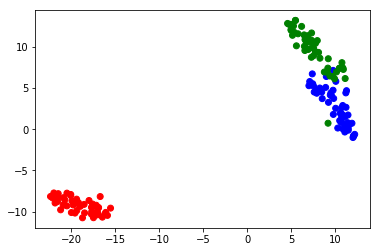

In [347]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [373]:
# printing shape of all the categorical and numerical data
print(titles_bow.shape)
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(school_state_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(grade_cat_one_hot.shape)
print(price_standardized.shape)

(109248, 3290)
(109248, 9)
(109248, 30)
(109248, 51)
(109248, 6)
(109248, 5)
(109248, 1)


In [356]:
# Creating merged numerical an dcategorical data with title BOW. 
data = hstack((titles_bow, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

# https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data = data.tocsr() 

# Applying t-SNE on first 6000 datapoint. 
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

#Configuring parameters with default values.
model = TSNE(n_components=2, random_state=0)
data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

print(bow_tsne_df.shape)


(6000, 3)


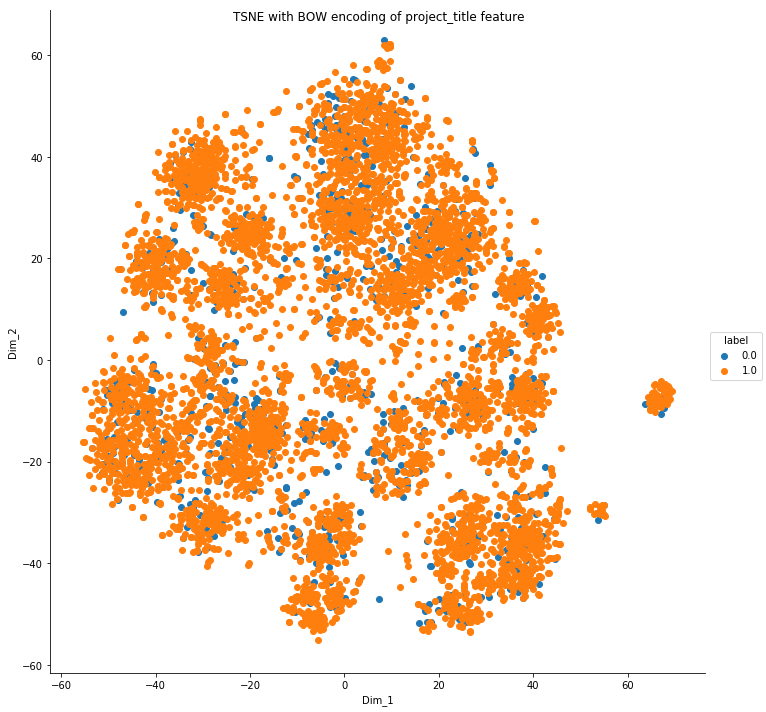

In [362]:
#Plotting TSNE with BOW encoding of project_title feature with perplexity 30 and iteration 1000
sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE with BOW encoding of project_title feature with perplexity 30 and iteration 1000')
plt.show()

**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

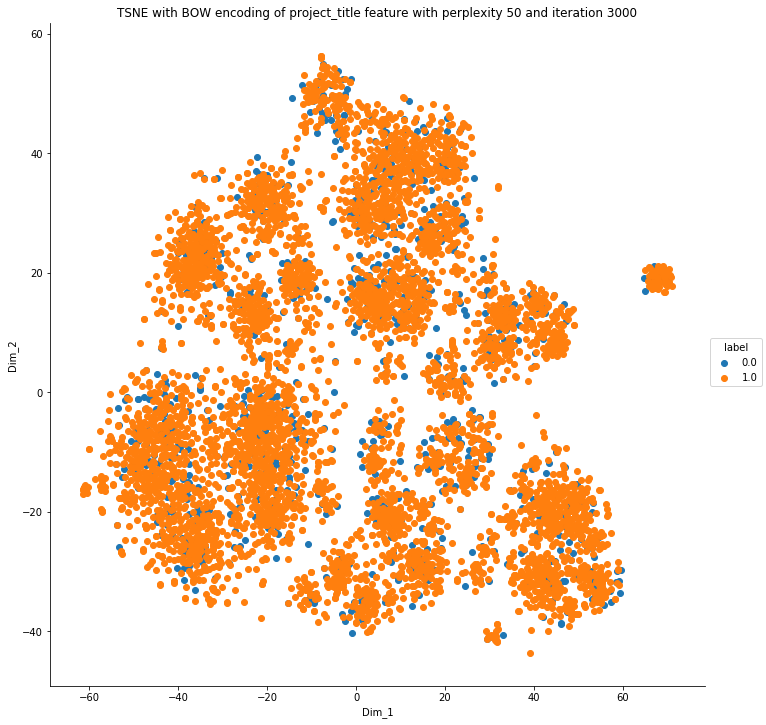

In [365]:

data = hstack((titles_bow, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

data = data.tocsr() # https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

#Changing the perplexity to 50 and iteration 3000
model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 3000)

data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE with BOW encoding of project_title feature with perplexity 50 and iteration 3000')
plt.show()

**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

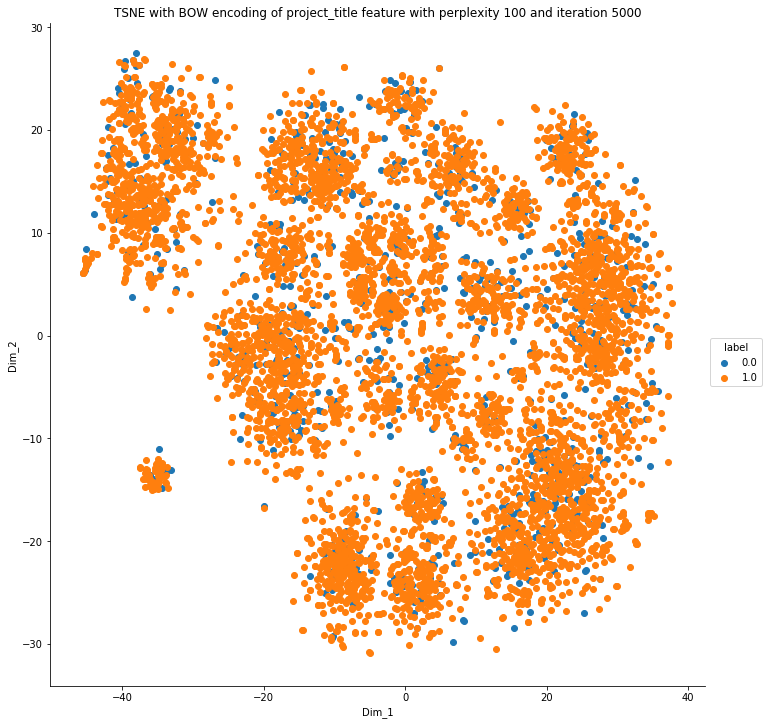

In [366]:
data = hstack((titles_bow, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

data = data.tocsr() # https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

# Changing perplexity to 100 and iteration 5000
model = TSNE(n_components=2, random_state=0, perplexity = 100, n_iter = 5000)

data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE with BOW encoding of project_title feature with perplexity 100 and iteration 5000')
plt.show()

**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

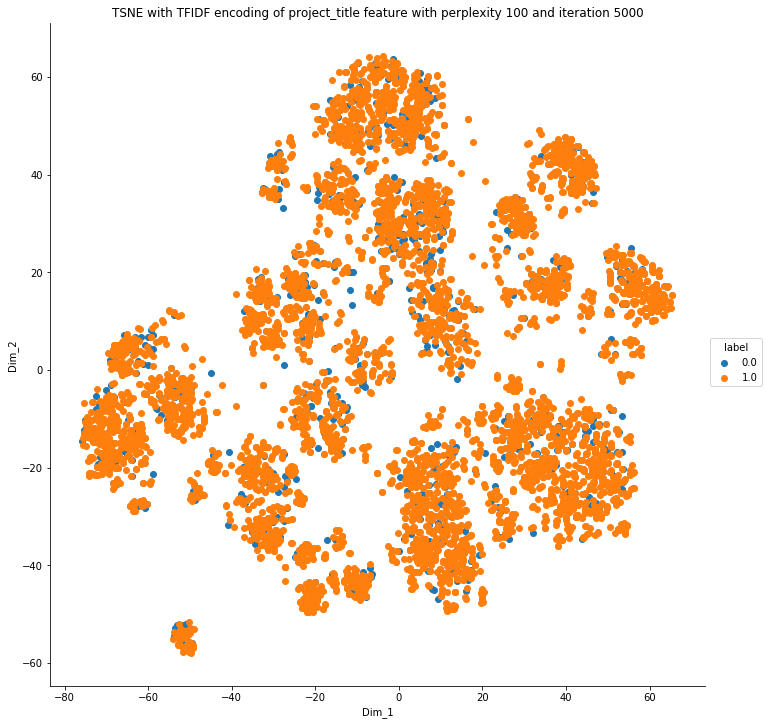

In [367]:
data = hstack((titles_tfidf, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

data = data.tocsr() # https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

model = TSNE(n_components=2, random_state=0, perplexity = 100, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE with TFIDF encoding of project_title feature with perplexity 100 and iteration 5000')
plt.show()

**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

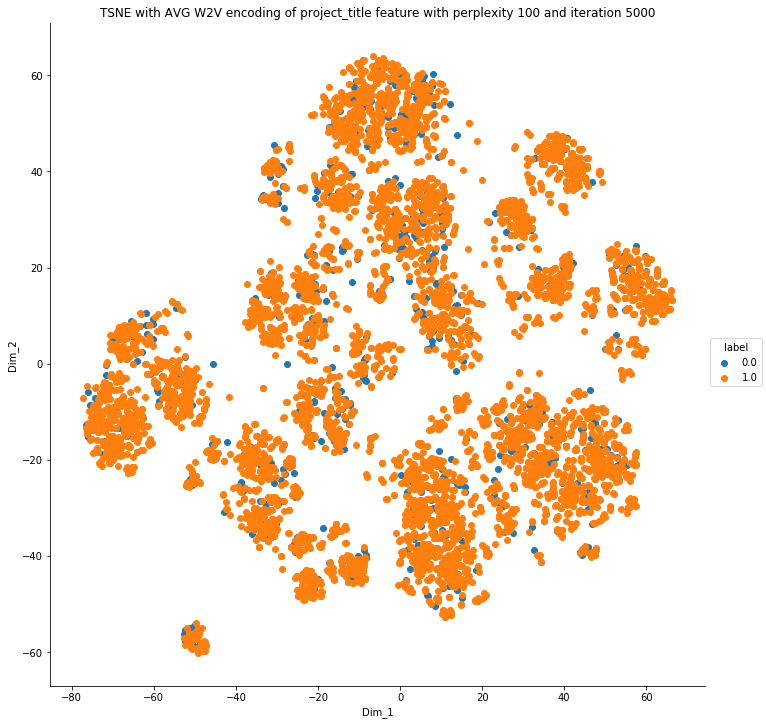

In [368]:
data = hstack((avg_w2v_titles_vectors, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

data = data.tocsr() # https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

model = TSNE(n_components=2, random_state=0, perplexity = 100, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE with AVG W2V encoding of project_title feature with perplexity 100 and iteration 5000')
plt.show()


**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

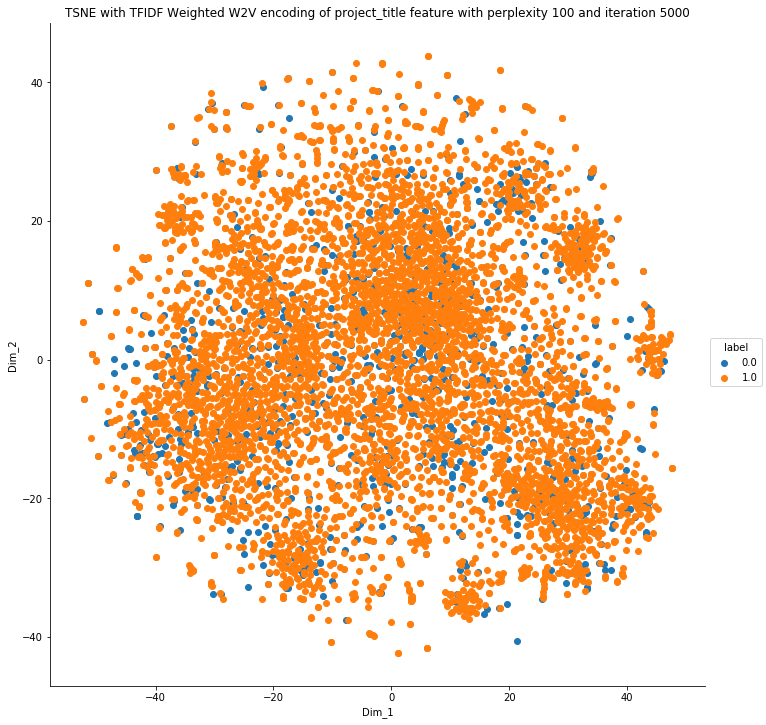

In [369]:
data = hstack((titles_tfidf_w2v_vectors, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

data = data.tocsr() # https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

model = TSNE(n_components=2, random_state=0, perplexity = 100, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE with TFIDF Weighted W2V encoding of project_title feature with perplexity 100 and iteration 5000')
plt.show()

**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

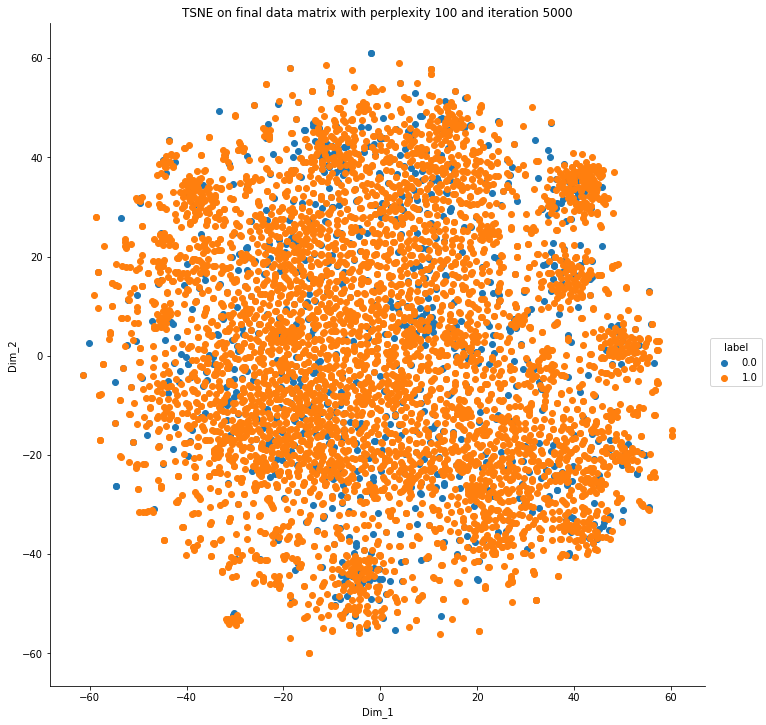

In [371]:
# Merging all the data and creating final data matrix.
data = hstack((titles_tfidf_w2v_vectors, avg_w2v_titles_vectors, titles_tfidf, titles_bow, categories_one_hot, sub_categories_one_hot, school_state_one_hot, teacher_prefix_one_hot,
                grade_cat_one_hot, price_standardized))

data = data.tocsr() # https://stackoverflow.com/questions/30163830/accessing-elements-in-coo-matrix
data_6000 = data[0:6000,:]

labels = project_data['project_is_approved']
labels_6000 = labels[0:6000]

model = TSNE(n_components=2, random_state=0, perplexity = 100, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
data_6000_embedding = data_6000.toarray()
bow_tsne_data = model.fit_transform(data_6000_embedding)


# creating a new data frame which help us in ploting the result data
bow_tsne_data = np.vstack((bow_tsne_data.T, labels_6000)).T
bow_tsne_df = pd.DataFrame(data = bow_tsne_data, columns = ("Dim_1", "Dim_2", "label"))

sns.FacetGrid(bow_tsne_df, hue = "label", size = 10).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.title('TSNE on final data matrix with perplexity 100 and iteration 5000')
plt.show()

**Observation: ** Data is high overlapped and very difficult to figure out ant conlcusion.

<h2> 2.5 Summary </h2>

** Observation** Visualisation of TSNE with numerical and categorical data with project title Bag of Words, TF-IDF, Avg Word2Vec, TF-IDF Weighted Word2Vec and even merging all to get final data matrix does not conclude anything. All the data are highly overlapped even if we try it with different perplexity and iterations. We need to use another data visulaization method to verify if any conclusion can be made.